# Chapter 3: Myerson's Lemma - The Universal Pricing Formula

In the previous chapter, we saw that charging the "Second-Highest Price" made people tell the truth. But that only works for simple, single-item auctions.

What happens if the game is more complex?
* **Sponsored Search:** There are 5 ad slots, some better than others.
* **Cloud Computing:** You want to buy CPU time, and getting 10 hours is better than 5.

How do we set the price *then* to stop people from lying?

## The Problem
We want to design a game where:
1.  **Allocation Rule ($x$):** Who gets what? (We usually give the most stuff to the highest bidders).
2.  **Payment Rule ($p$):** How much do they pay?

If we mess up the payment rule, people will lie.

## The Solution: Myerson's Lemma
Roger Myerson (a Nobel laureate) discovered a powerful rule. He proved that for *any* single-parameter environment (where you have one value for "getting the stuff"), you don't have to guess the payment rule. The math decides it for you.

**Myerson's Lemma states:**
1.  **Monotonicity:** The allocation rule must be "sensible." If you bid more, you must get **more** (or the same) amount of stuff. You can never get *less* by paying *more*.
2.  **Unique Payments:** Once you choose an allocation rule, there is **only one** mathematical formula for the payments that ensures truthfulness.

### The Magic Formula
The payment isn't just a random number. It is related to the **area under the curve** of your allocation function.

$$\text{Payment} = \text{Bid} \times \text{Allocation} - \text{(Area under the Allocation Curve)}$$

Let's visualize this, because it turns a complex calculus concept into a simple geometry problem.

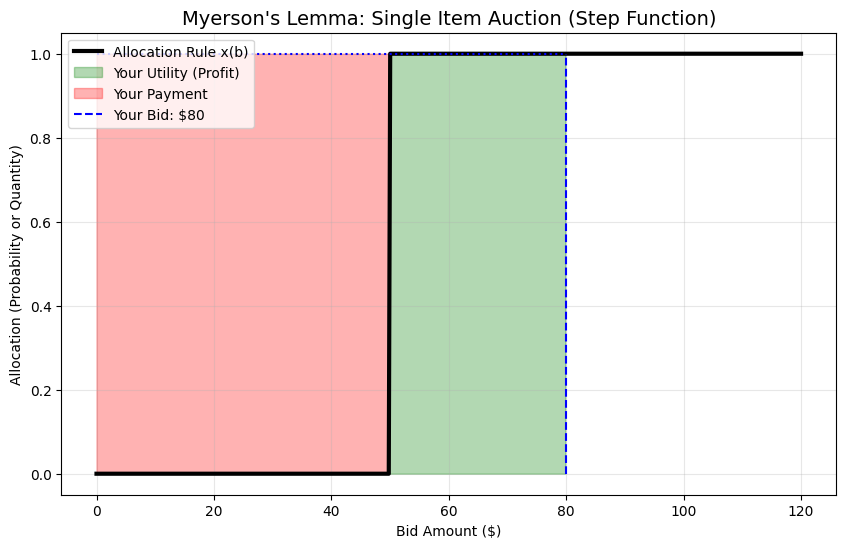

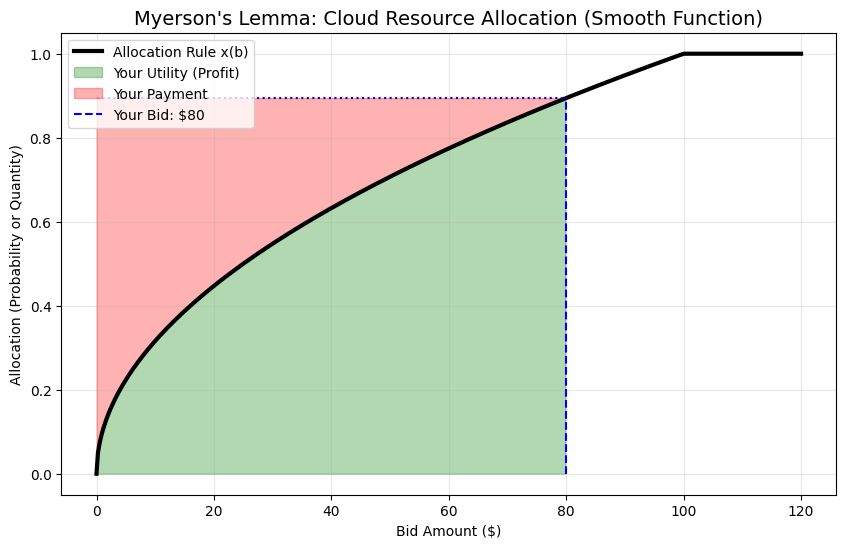

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_myerson_payment(bid, allocation_func, rule_name):
    """
    Visualizes Myerson's Payment formula as areas on a graph.
    """
    
    # Generate a range of possible bids (0 to 1.5x the actual bid)
    b_values = np.linspace(0, bid * 1.5, 500)
    x_values = [allocation_func(b) for b in b_values]
    
    # Calculate the specific values for the User's Bid
    my_allocation = allocation_func(bid)
    
    # --- PLOTTING ---
    plt.figure(figsize=(10, 6))
    
    # 1. Plot the Allocation Curve x(b)
    plt.plot(b_values, x_values, color='black', linewidth=3, label='Allocation Rule x(b)')
    
    # 2. Shade the "Surplus" (Profit) Area (The area UNDER the curve)
    # Myerson says: Your Utility = Area UNDER the curve up to your bid
    plt.fill_between(b_values, x_values, where=(b_values <= bid), 
                     color='green', alpha=0.3, label='Your Utility (Profit)')
    
    # 3. Shade the "Payment" Area (The rectangle MINUS the curve)
    # Total Value = Bid * Allocation (The full rectangle)
    # Payment = Total Rectangle - Utility Area
    plt.fill_between(b_values, x_values, my_allocation, where=(b_values <= bid), 
                     color='red', alpha=0.3, label='Your Payment')
    
    # Draw the specific bid line
    plt.vlines(bid, 0, my_allocation, color='blue', linestyle='--', label=f'Your Bid: ${bid}')
    plt.hlines(my_allocation, 0, bid, color='blue', linestyle=':')
    
    plt.title(f"Myerson's Lemma: {rule_name}", fontsize=14)
    plt.xlabel("Bid Amount ($)")
    plt.ylabel("Allocation (Probability or Quantity)")
    plt.legend(loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.show()

# --- DEFINE DIFFERENT RULES ---

# Rule 1: Single Item (Step Function)
# If you bid > 50, you get the item (1). If not, you get nothing (0).
# This mimics a Second-Price auction where the 2nd highest bid was 50.
def single_item_allocation(b):
    return 1.0 if b >= 50 else 0.0

# Rule 2: Fractional / Probability (Smooth Curve)
# The more you bid, the higher probability you have of winning, or the more resources you get.
# Example: x(b) = sqrt(b) / 10 (capped at 1.0)
def smooth_allocation(b):
    val = np.sqrt(b) / 10
    return min(val, 1.0)

# --- RUN VISUALIZATION ---

# Scenario A: You bid $80 in a Single Item auction (Threshold was $50)
plot_myerson_payment(80, single_item_allocation, "Single Item Auction (Step Function)")

# Scenario B: You bid $80 in a Resource Allocation auction (Smooth Curve)
plot_myerson_payment(80, smooth_allocation, "Cloud Resource Allocation (Smooth Function)")

### Analysis of the Graphs

**Graph 1: Single Item (The Step Function)**
* Look at the "Red Area" (Payment).
* The allocation jumps from 0 to 1 exactly at \$50 (this represents the competing bid).
* Even though you bid **\$80**, the math shows you only pay the area defined by that jump: **\$50**.
* This proves that the "Second-Price" rule is just a specific version of Myerson's Lemma!

**Graph 2: Smooth Allocation**
* Here, bidding higher gets you *gradually* more stuff.
* Notice the Green Area (Profit) and Red Area (Payment).
* **The Intuition:** You don't pay your full bid. You get a "discount" equal to the green area.
* The green area represents the "extra value" you bring to the system.

**Conclusion:**
Mechanism Design is powerful because it turns "incentives" into "geometry." If we want people to tell the truth, we simply calculate their payment as the red area on the graph. We don't need to trust them; the formula keeps them honest.